Punteggi iniziali di karma:
Nodo 0: Karma 96
Nodo 9: Karma 83
Nodo 1: Karma 49
Nodo 3: Karma 45
Nodo 6: Karma 41
Nodo 7: Karma 39
Nodo 4: Karma 21
Nodo 5: Karma 7
Nodo 2: Karma 5
Nodo 8: Karma 2


<ipython-input-2-efe2a95f62e0>:41: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  nodo1, nodo2 = random.sample(G.nodes(), 2)


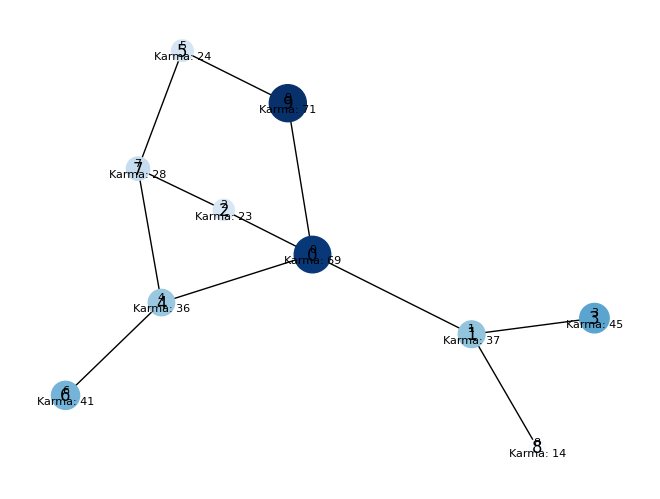

Punteggi finali di karma:
Nodo 9: Karma 71
Nodo 0: Karma 69
Nodo 3: Karma 45
Nodo 6: Karma 41
Nodo 1: Karma 37
Nodo 4: Karma 36
Nodo 7: Karma 28
Nodo 5: Karma 24
Nodo 2: Karma 23
Nodo 8: Karma 14


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import random

# Crea un grafo con n nodi
n = 10  # Numero di nodi
G = nx.Graph()

# Aggiungi nodi al grafo e assegna un punteggio di karma iniziale
karma = {}
for i in range(n):
    G.add_node(i)
    karma[i] = random.randint(1, 100)  # Karma iniziale casuale

# Aggiungi archi tra i nodi (interazioni possibili)
for i in range(n):
    for j in range(i + 1, n):
        if random.random() < 0.3:  # Probabilità di avere un'interazione
            G.add_edge(i, j)

# Stampa i punteggi iniziali di karma
print("Punteggi iniziali di karma:")
for nodo in sorted(karma, key=karma.get, reverse=True):
    print(f"Nodo {nodo}: Karma {karma[nodo]}")


# Simula interazioni tra nodi e trasferimento di karma
def interazione(nodo1, nodo2):
    if karma[nodo1] > karma[nodo2]:
        trasferimento = (karma[nodo1] - karma[nodo2]) // 10
        karma[nodo1] -= trasferimento
        karma[nodo2] += trasferimento
    elif karma[nodo1] < karma[nodo2]:
        trasferimento = (karma[nodo2] - karma[nodo1]) // 10
        karma[nodo1] += trasferimento
        karma[nodo2] -= trasferimento

# Esegui un numero definito di interazioni
n_interazioni = 100
for _ in range(n_interazioni):
    nodo1, nodo2 = random.sample(G.nodes(), 2)
    if G.has_edge(nodo1, nodo2):
        interazione(nodo1, nodo2)

# Visualizza il grafo con i punteggi di karma finali
pos = nx.spring_layout(G)
node_size = [karma[i] * 10 for i in G.nodes()]
nx.draw(G, pos, with_labels=True, node_size=node_size, node_color=node_size, cmap=plt.cm.Blues)
labels = {i: f"{i}\nKarma: {karma[i]}" for i in G.nodes()}
nx.draw_networkx_labels(G, pos, labels, font_size=8)
plt.show()

# Stampa i punteggi finali di karma
print("Punteggi finali di karma:")
for nodo in sorted(karma, key=karma.get, reverse=True):
    print(f"Nodo {nodo}: Karma {karma[nodo]}")
